In [16]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
    !wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
      -O /tmp/messy_vs_clean_room.zip

--2021-06-23 00:31:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  5.06MB/s    in 18s     

2021-06-23 00:32:08 (3.78 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import os

os.listdir('/tmp/images/train')

['clean', 'messy']

In [ ]:
    # membuat direktori ruangan rapi pada direktori data training
    train_clean_dir = os.path.join(train_dir, 'clean')
     
    # membuat direktori ruangan berantakan pada direktori data training
    train_messy_dir = os.path.join(train_dir, 'messy')
     
    # membuat direktori ruangan rapi pada direktori data validasi
    validation_clean_dir = os.path.join(validation_dir, 'clean')
     
    # membuat direktori ruangan berantakan pada direktori data validasi
    validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
os.listdir('/tmp/images/train/clean')

['32.png',
 '49.png',
 '21.png',
 '65.png',
 '86.png',
 '12.png',
 '14.png',
 '52.png',
 '39.png',
 '91.png',
 '62.png',
 '68.png',
 '54.png',
 '0.png',
 '31.png',
 '3.png',
 '75.png',
 '42.png',
 '22.png',
 '95.png',
 '26.png',
 '53.png',
 '46.png',
 '6.png',
 '34.png',
 '89.png',
 '18.png',
 '92.png',
 '47.png',
 '44.png',
 '78.png',
 '66.png',
 '90.png',
 '73.png',
 '5.png',
 '23.png',
 '20.png',
 '30.png',
 '8.png',
 '15.png',
 '57.png',
 '10.png',
 '79.png',
 '28.png',
 '71.png',
 '25.png',
 '67.png',
 '85.png',
 '80.png',
 '87.png',
 '82.png',
 '9.png',
 '94.png',
 '51.png',
 '1.png',
 '37.png',
 '58.png',
 '59.png',
 '93.png',
 '11.png',
 '13.png',
 '29.png',
 '4.png',
 '72.png',
 '35.png',
 '56.png',
 '88.png',
 '84.png',
 '33.png',
 '16.png',
 '41.png',
 '64.png',
 '19.png',
 '50.png',
 '7.png',
 '61.png',
 '63.png',
 '45.png',
 '55.png',
 '27.png',
 '60.png',
 '24.png',
 '83.png',
 '48.png',
 '70.png',
 '43.png',
 '40.png',
 '77.png',
 '38.png',
 '69.png',
 '81.png',
 '2.png'

In [ ]:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
    train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')
     
    test_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')

In [ ]:
    train_generator = train_datagen.flow_from_directory(
            train_dir,  # direktori data latih
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4,
            # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='binary')
     
    validation_generator = test_datagen.flow_from_directory(
            validation_dir, # direktori data validasi
            target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
    # compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [ ]:
    # latih model dengan model.fit 
    model.fit(
          train_generator,
          steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20, # tambahkan eposchs jika akurasi model belum optimal
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.7546 - accuracy: 0.5200 - val_loss: 0.6636 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 6s - loss: 0.6553 - accuracy: 0.6200 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6027 - accuracy: 0.7100 - val_loss: 0.6404 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 6s - loss: 0.6224 - accuracy: 0.6900 - val_loss: 0.6136 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 6s - loss: 0.6435 - accuracy: 0.6800 - val_loss: 0.6961 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 6s - loss: 0.6175 - accuracy: 0.7400 - val_loss: 0.6065 - val_accuracy: 0.8000
Epoch 7/20
25/25 - 6s - loss: 0.5061 - accuracy: 0.7900 - val_loss: 0.4576 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 6s - loss: 0.6086 - accuracy: 0.6900 - val_loss: 0.5850 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 6s - loss: 0.5971 - accuracy: 0.7000 - val_loss: 0.5384 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 6s - loss: 0.5390 - accuracy: 0.7400 - val_loss: 0.5186 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

Saving clean-room.jpeg to clean-room.jpeg
clean-room.jpeg
clean


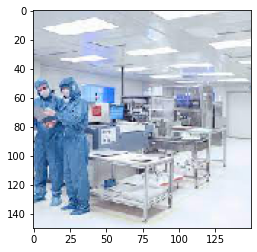

In [17]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes==0:
        print('clean')
      else:
        print('messy')

Saving messy-room.jpeg to messy-room.jpeg
messy-room.jpeg
messy


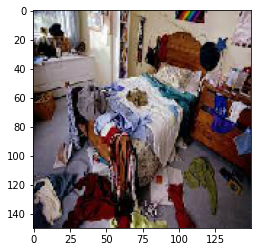

In [18]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes==0:
        print('clean')
      else:
        print('messy')